In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# additional modules
import sys

In [2]:
np.random.seed(42)

In [3]:
all_files=[]
import os
for root, dirs, files in os.walk("./data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [4]:
list_of_df = {file: pd.read_csv(file, 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file}

In [5]:
help_modelica = list_of_df['./data/other\\22.csv']

In [6]:
mean_vibro1 = help_modelica['Accelerometer1RMS'].mean()
std_vibro1 = help_modelica['Accelerometer1RMS'].std()
mean_vibro2 = help_modelica['Accelerometer2RMS'].mean()
std_vibro2 = help_modelica['Accelerometer2RMS'].std()

In [7]:
cols = help_modelica.columns
cols

Index(['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure',
       'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS',
       'anomaly', 'changepoint'],
      dtype='object')

In [8]:
print(std_vibro1, std_vibro2)
rd_vibro1, rd_vibro2 = np.random.uniform(-std_vibro1, std_vibro1),\
                            np.random.uniform(-std_vibro2, std_vibro2)

0.008595782823858025 0.007123919663030757


In [9]:
mean_current = help_modelica['Current'].mean()
std_current = help_modelica['Current'].std()

In [10]:
std_current

9.827541965037312

In [11]:
mean_voltage = help_modelica['Voltage'].mean()
std_voltage = help_modelica['Voltage'].std()

In [12]:
std_voltage

14.826519555262433

In [13]:
std_flow_rate = help_modelica['Volume Flow RateRMS'].std()
mean_flow_rate = help_modelica['Volume Flow RateRMS'].mean()

In [14]:
std_flow_rate

53.41342751075701

In [15]:
mean_flow_rate

85.89793451899908

In [16]:
corr_matrix = help_modelica.corr()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

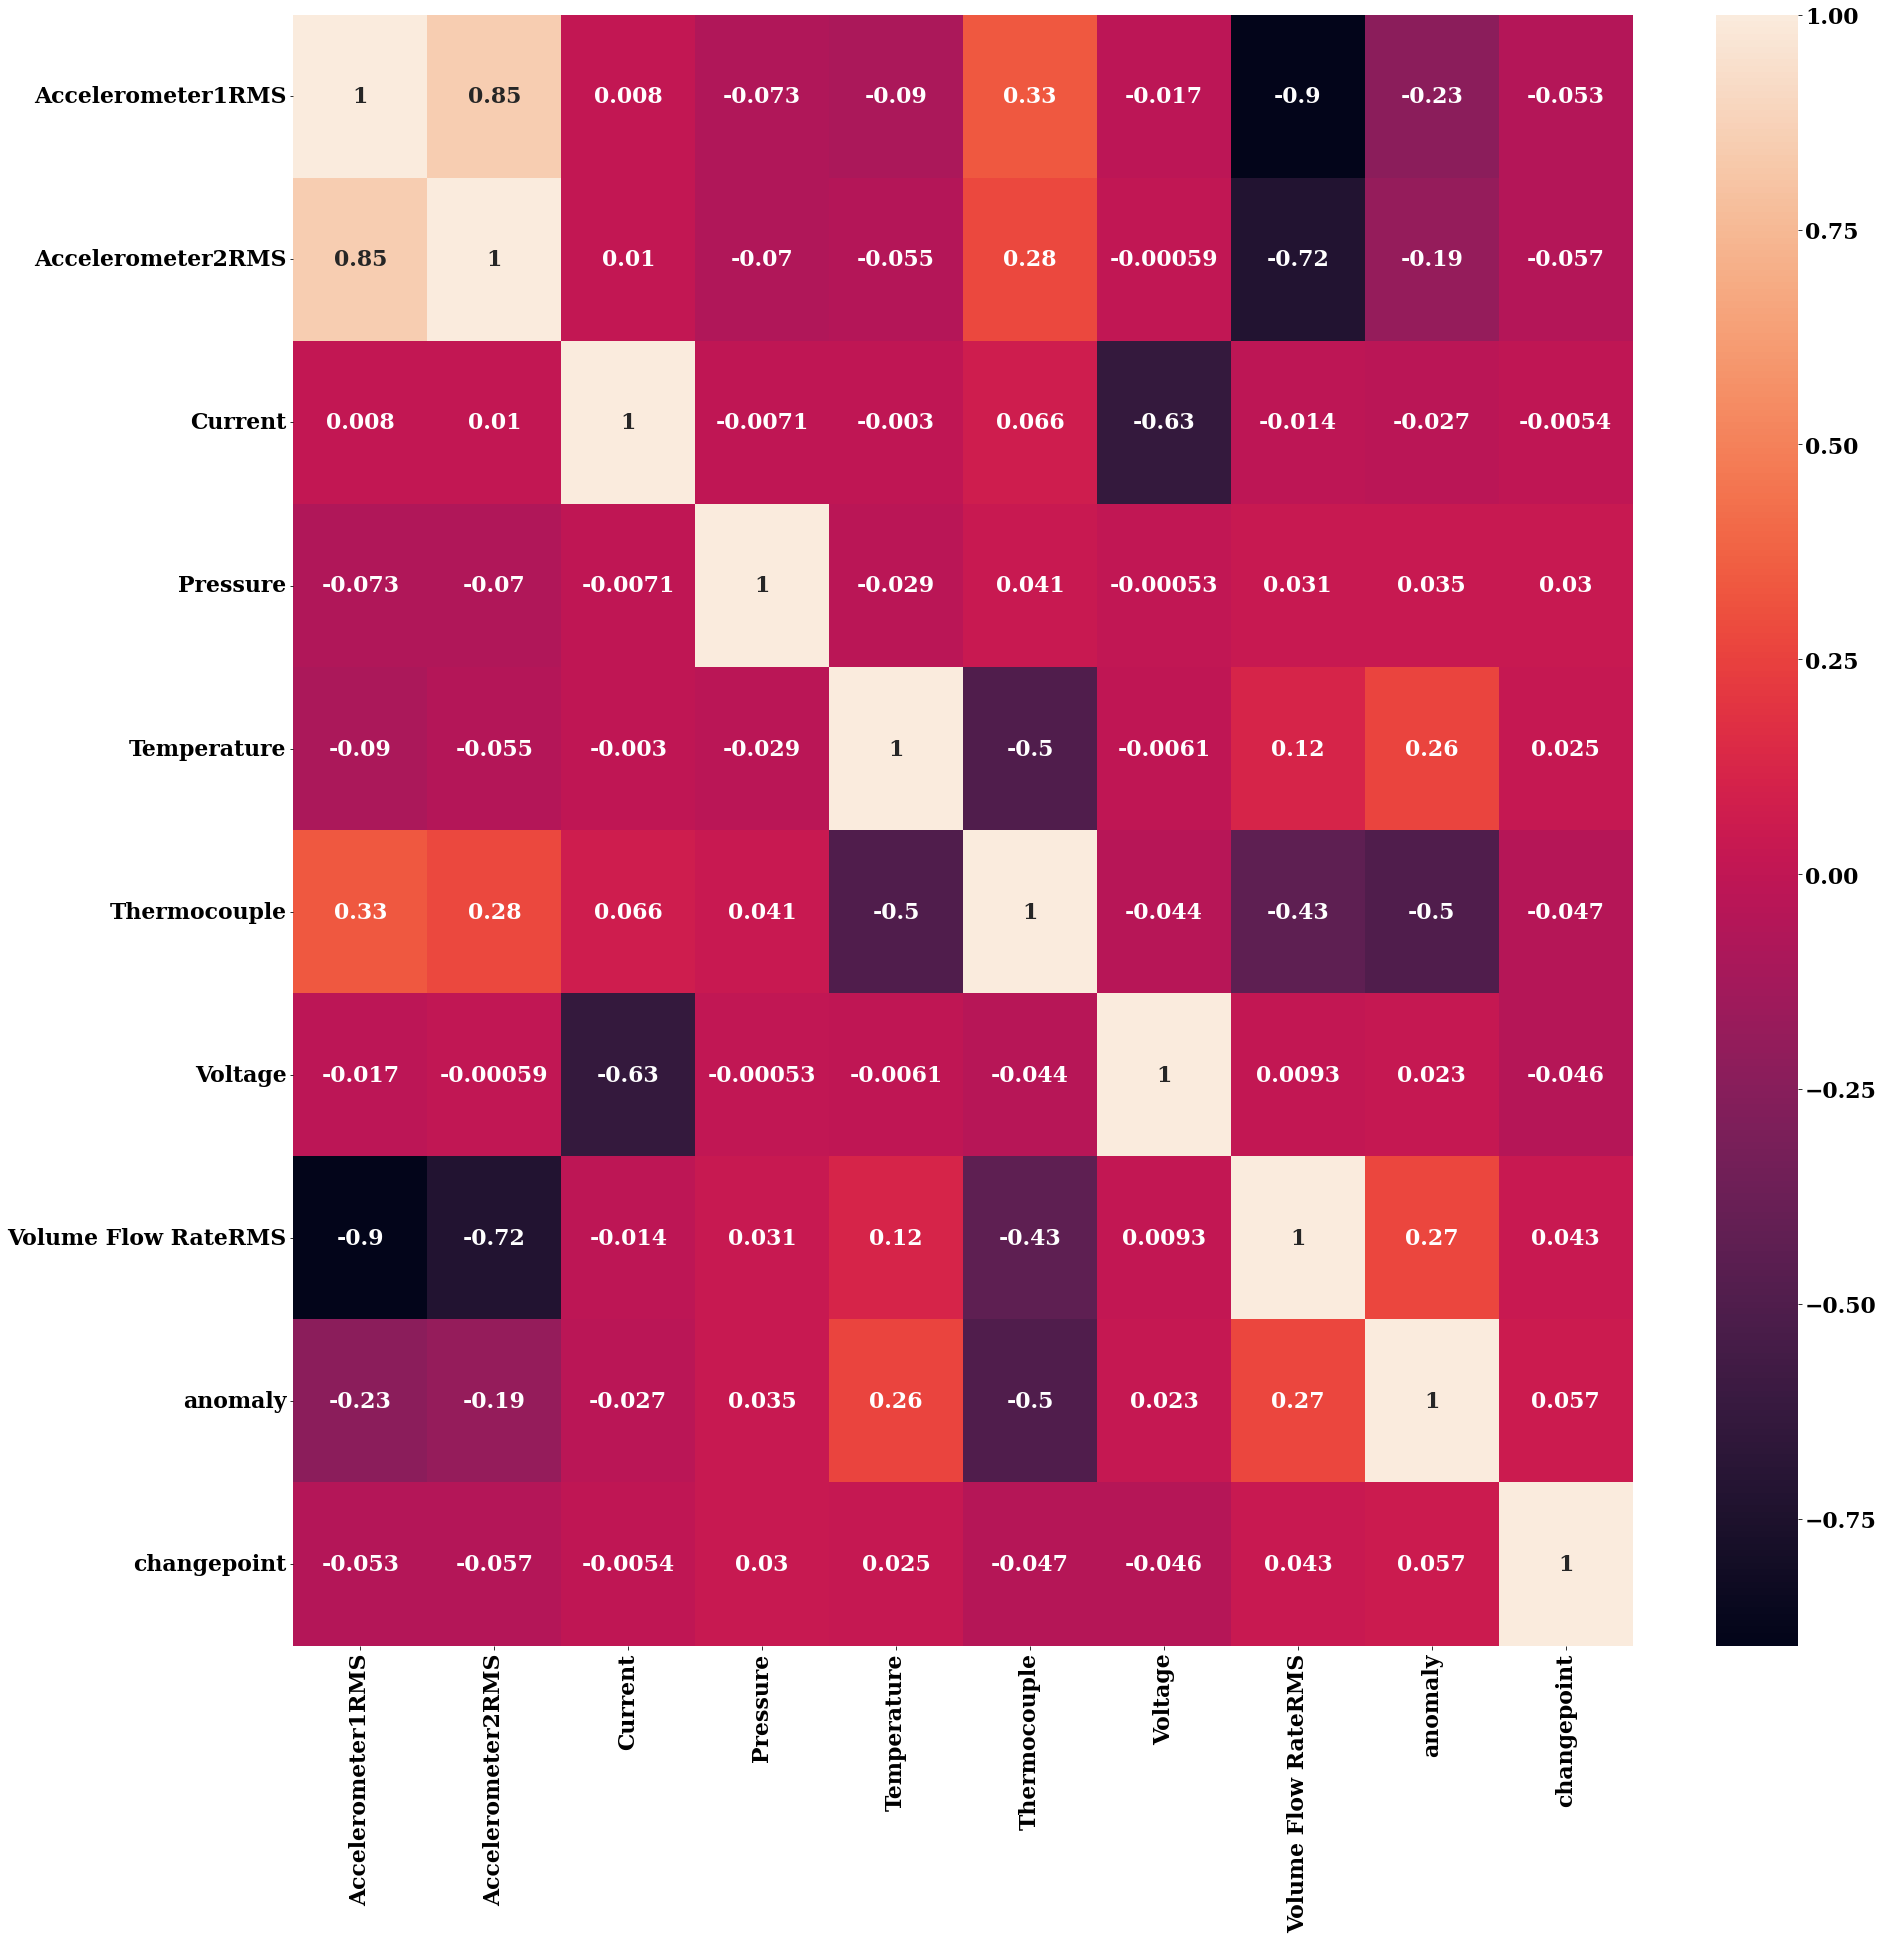

In [18]:
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
mean_temperature = help_modelica['Temperature'].mean()
std_temperature = help_modelica['Temperature'].std()

In [21]:
send_to = help_modelica.copy(deep=True)

In [22]:
send_to['Temperature'] = send_to['Temperature'].apply(lambda row: mean_temperature + np.random.uniform(-std_temperature, std_temperature))

In [23]:
send_to['Accelerometer1RMS'] = send_to['Accelerometer1RMS'].apply(lambda row: mean_vibro1 + np.random.uniform(-std_vibro1, std_vibro1))
send_to['Accelerometer2RMS'] = send_to['Accelerometer2RMS'].apply(lambda row: mean_vibro2 + np.random.uniform(-std_vibro2, std_vibro2))

send_to['Current'] = send_to['Current'].apply(lambda row: mean_current + np.random.uniform(-std_current, std_current))
send_to['Voltage'] = send_to['Voltage'].apply(lambda row: mean_voltage + np.random.uniform(-std_voltage, std_voltage))

In [24]:
send_to.sample()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-02-08 19:04:33,0.244353,0.297283,-4.917048,0.382638,85.337552,28.8599,234.404273,125.309,0.0,0.0


In [25]:
cols_to_fit = [
    'Pressure',
    'Thermocouple',
    'Volume Flow RateRMS'
]
info = {
    'Давление в контуре после водяного насоса (бар)',
    'Температура жидкости в циркуляционном контуре (градус Цельсия)',
    'Расход циркулирующей жидкости внутри контура (Литр в минуту)',
}
cols_info = dict(zip(cols_to_fit, info))

In [26]:
cols_info

{'Pressure': 'Давление в контуре после водяного насоса (бар)',
 'Thermocouple': 'Расход циркулирующей жидкости внутри контура (Литр в минуту)',
 'Volume Flow RateRMS': 'Температура жидкости в циркуляционном контуре (градус Цельсия)'}

In [30]:
import json

f = open('help_with_modelica.json', 'w')
json.dump(cols_info, f)
f.close()

In [32]:
send_to.to_csv('to_modelica.csv')